In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
df =  pd.read_csv('C:/Users/chimi/Desktop/Python Data Science Projects/Heart Disease/heart.csv')

In [3]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Rows and columns(Dimension)
df.shape[0], df.shape[1]

(1025, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: xlabel='index', ylabel='0'>

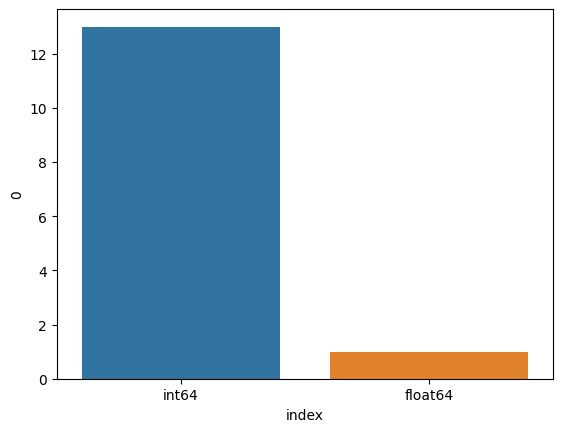

In [17]:
# Data types
# Int type dominate the data
d_types = pd.DataFrame(df.dtypes.value_counts()).reset_index()
sns.barplot(x='index',y=0,data=d_types)

<Axes: xlabel='age', ylabel='Count'>

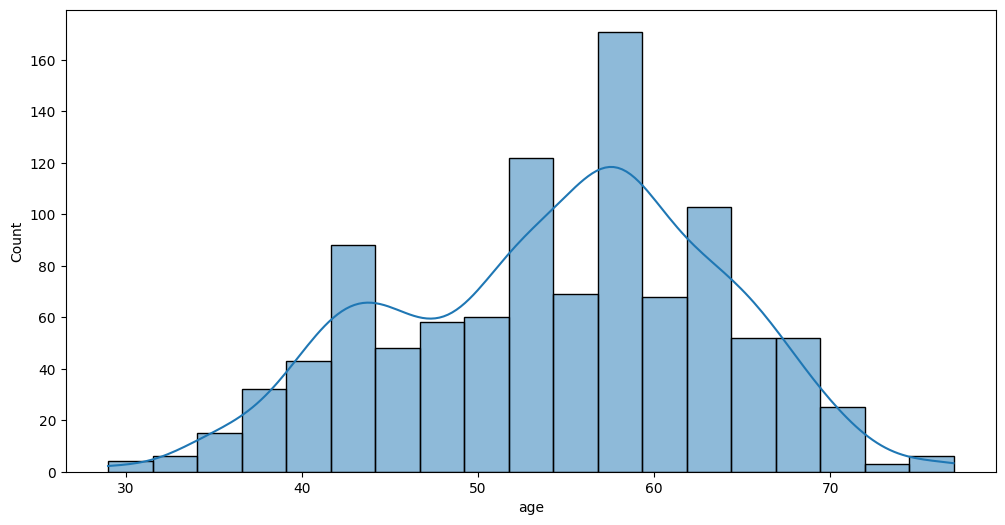

In [21]:
# Exploring age column
# What is the age distribution of individuals in the dataset?
plt.figure(figsize=(12,6))
plt.title
sns.histplot(df['age'],kde=True)

In [22]:
df['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

<Axes: xlabel='count', ylabel='cp'>

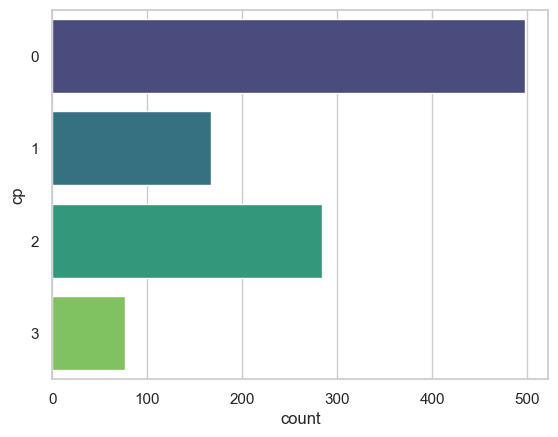

In [42]:
# Question 3 
# What is the distribution of different types of chest pain (cp) within the dataset?
sns.countplot(y='cp',data=df, palette='viridis')

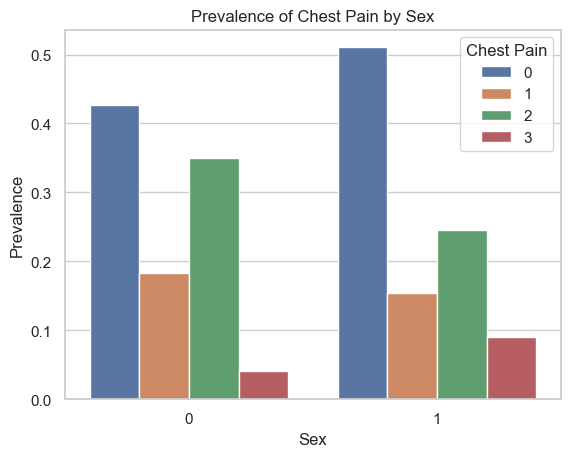

In [38]:
# How does the prevalence of chest pain differ between males and females?

df_filtered = df[['sex', 'cp']]

# Calculate count of individuals by sex and chest pain status
count_by_sex_cp = df_filtered.groupby(['sex', 'cp']).size().unstack()

# Calculate prevalence of chest pain for each sex
prevalence_by_sex = count_by_sex_cp.div(count_by_sex_cp.sum(axis=1), axis=0)

# Reset index for plotting
prevalence_by_sex = prevalence_by_sex.reset_index()

# Melt the DataFrame for stacked bar plot
melted_data = pd.melt(prevalence_by_sex, id_vars='sex', var_name='Chest Pain', value_name='Prevalence')

# Plot using seaborn
sns.set(style="whitegrid")
ax = sns.barplot(x='sex', y='Prevalence', hue='Chest Pain', data=melted_data)

# Set labels and title
ax.set_xlabel('Sex')
ax.set_ylabel('Prevalence')
ax.set_title('Prevalence of Chest Pain by Sex')

# Show the plot
plt.show()


Text(0.5, 1.0, 'Distribution of trestbps')

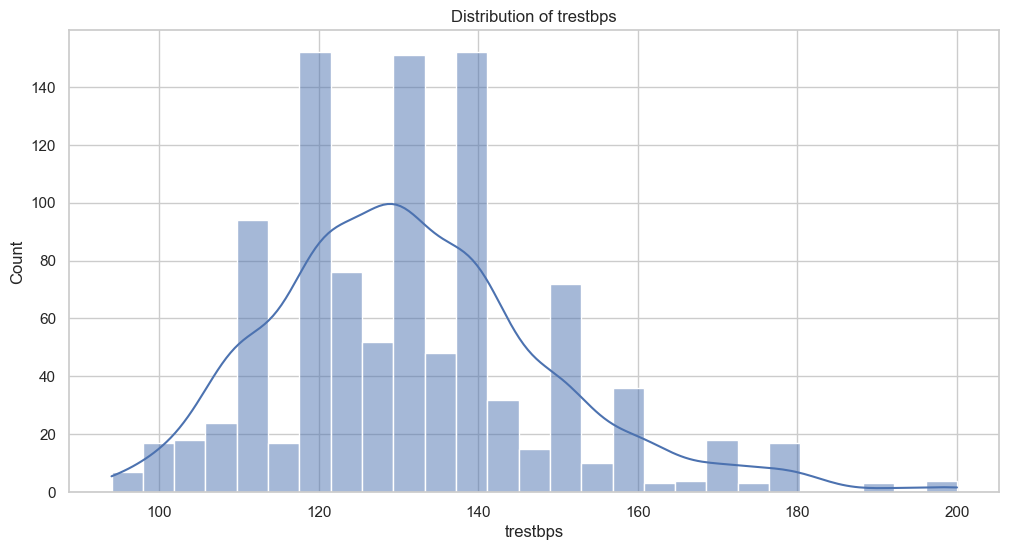

In [47]:
# What is the range of resting blood pressure(trestbps) values recorded in the dataset?
plt.figure(figsize=(12,6))
sns.histplot(x='trestbps',data=df,kde=True)
plt.title('Distribution of trestbps')

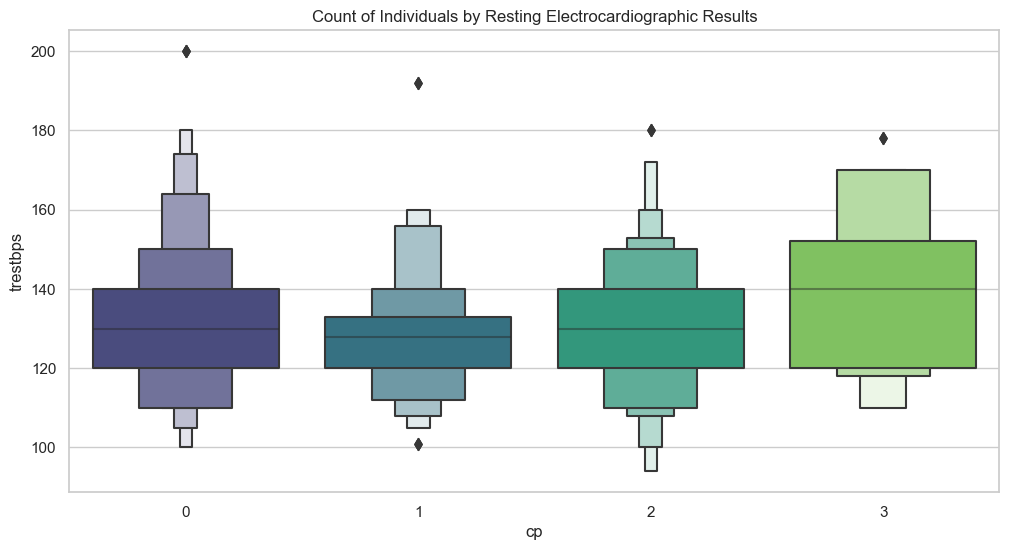

In [69]:
# How does the cholestrol(chol) level vary among individuals with and without chest pains?
plt.figure(figsize=(12,6))
sns.boxenplot(x='cp',y='trestbps',data=df, palette='viridis')

# Set labels and title
plt.title('Count of Individuals by Resting Electrocardiographic Results')

# Show the plot
plt.show()

In [60]:
threshold = 100

proportion_above_threshold = (df['fbs'] > threshold).shape[0]
total_rows = 

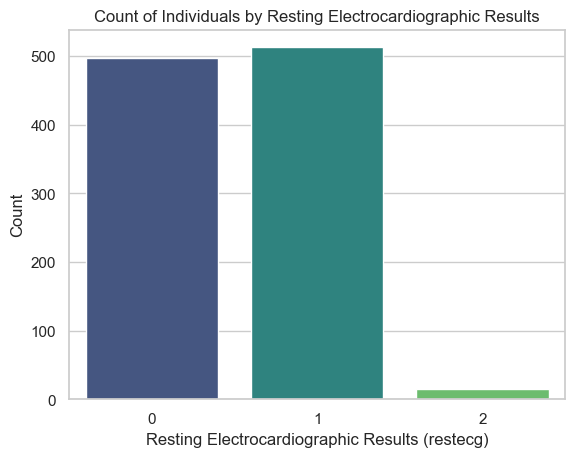

In [67]:
# How many individuals have different restecg (resting electrocardiographic results) values recorded?
sns.countplot(x='restecg', data= df, palette='viridis', )

# Set labels and title
plt.xlabel('Resting Electrocardiographic Results (restecg)')
plt.ylabel('Count')
plt.title('Count of Individuals by Resting Electrocardiographic Results')

# Show the plot
plt.show()

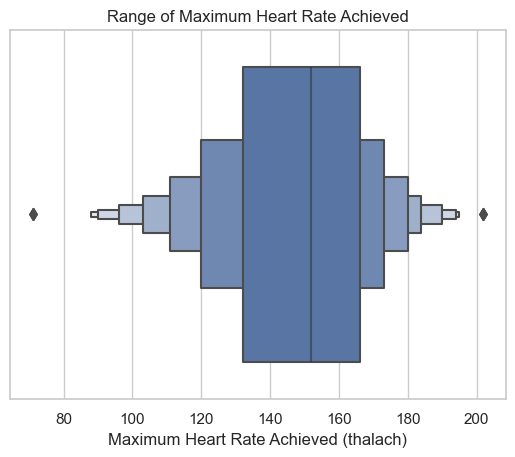

In [71]:
# What is the range of maximum heart rate achieved (thalach) among the individuals in the dataset?
sns.boxenplot(x=df['thalach'])
plt.xlabel('Maximum Heart Rate Achieved (thalach)')
plt.title('Range of Maximum Heart Rate Achieved')
plt.show()

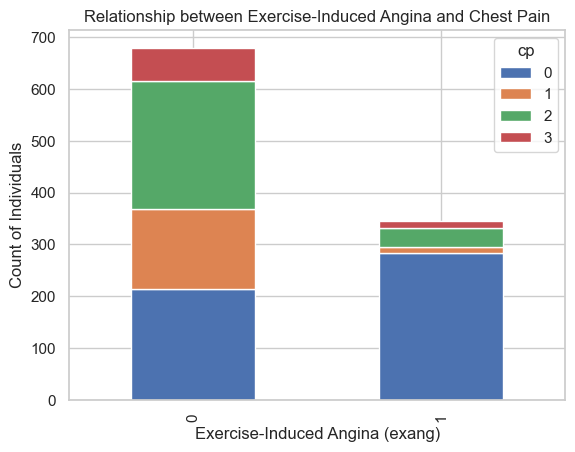

In [73]:
# How does the presence of exercise-induced angina (exang) relate to chest pain occurrence?

# Filter relevant columns
df_filtered = df[['exang','cp']]

# Calculate the count of individuals for each combination of exang and cp
count_by_exang_cp = df_filtered.groupby(['exang', 'cp']).size().unstack()

# Create a stacked bar plot
count_by_exang_cp.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Exercise-Induced Angina (exang)')
plt.ylabel('Count of Individuals')
plt.title('Relationship between Exercise-Induced Angina and Chest Pain')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Distribution of oldpeak')

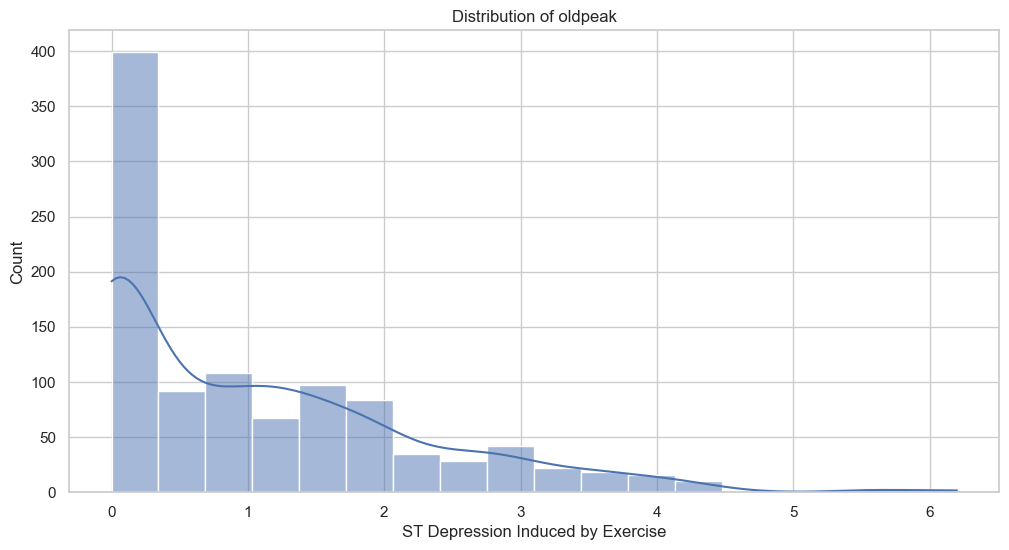

In [75]:
# What is the distribution of ST depression  induced by exercise relative to rest

plt.figure(figsize=(12,6))
sns.histplot(data=df, x='oldpeak', kde=True)

# Set the labels and title
plt.xlabel('ST Depression Induced by Exercise')
plt.ylabel('Count')
plt.title('Distribution of oldpeak')

# Show the plot

<Axes: xlabel='count', ylabel='slope'>

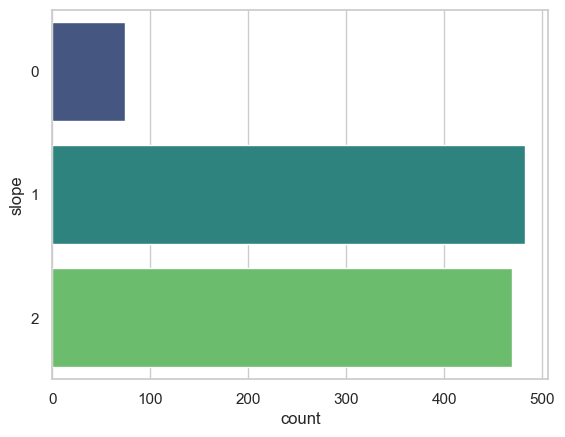

In [78]:
#How many individuals have different types of the slope of the peak exercise ST segment (slope) seperated ?
sns.countplot(y='slope', data=df,palette='viridis')

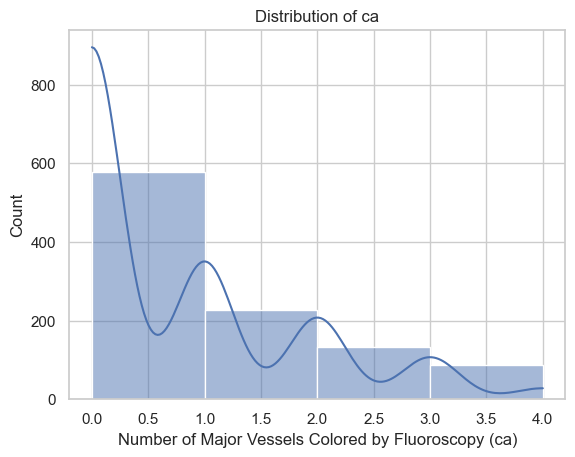

In [81]:
# What is the distribution of the number of major vessels colored by fluoroscopy (ca) among the individuals?
sns.histplot(data=df, x='ca', bins=range(5),kde=True)

# Set labels and title
plt.xlabel('Number of Major Vessels Colored by Fluoroscopy (ca)')
plt.ylabel('Count')
plt.title('Distribution of ca')

# Show the plot
plt.show()

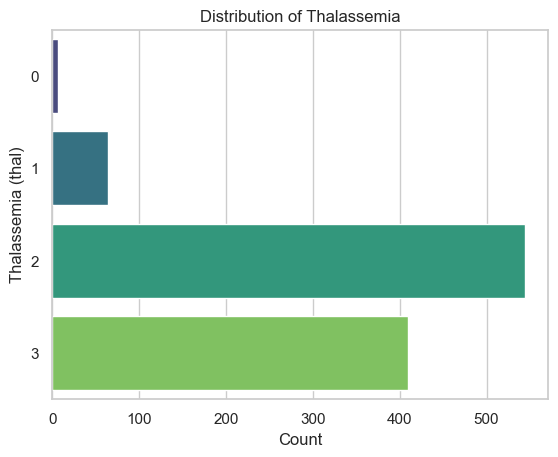

In [86]:
# What are the different values of thalassemia (thal) recorded in the dataset?
# Create a count plot of thal values
sns.countplot(y='thal', data=df, palette='viridis')

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Thalassemia (thal)')
plt.title('Distribution of Thalassemia')

# Show the plot
plt.show()

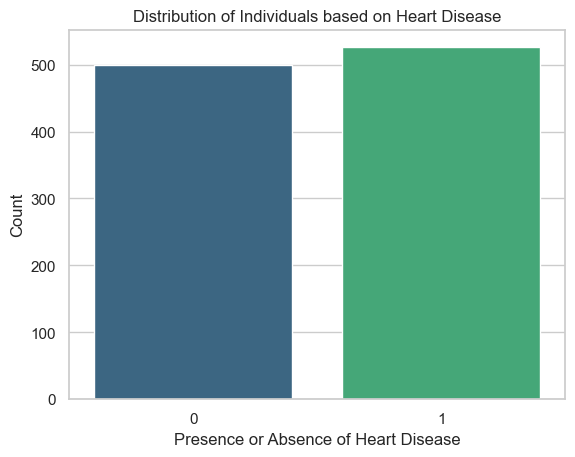

In [87]:
# What is the distribution of individuals based on the presence or absence of heart disease (target)?

sns.countplot(x='target', data=df, palette='viridis')

# Set labels and title
plt.xlabel('Presence or Absence of Heart Disease')
plt.ylabel('Count')
plt.title('Distribution of Individuals based on Heart Disease')

# Show the plot
plt.show()

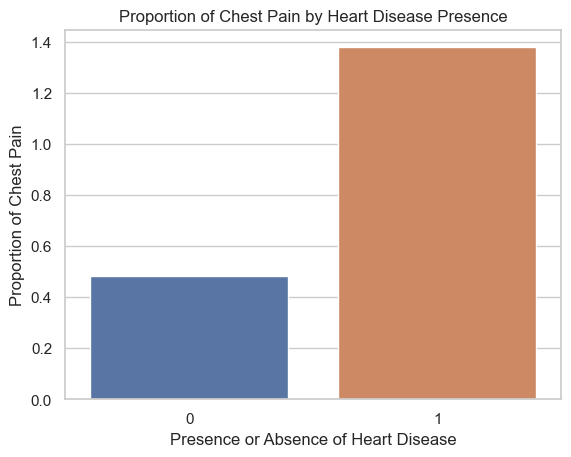

In [89]:
# Do people who have heart disease likely experience more chest pain?

# Calculate the proportion of chest pain (cp) for each target category
proportion_cp_by_target = df.groupby('target')['cp'].mean()

# Create a bar plot to compare the proportion of chest pain by target
sns.barplot(x=proportion_cp_by_target.index, y=proportion_cp_by_target.values)

# Set labels and title
plt.xlabel('Presence or Absence of Heart Disease')
plt.ylabel('Proportion of Chest Pain')
plt.title('Proportion of Chest Pain by Heart Disease Presence')

# Show the plot
plt.show()

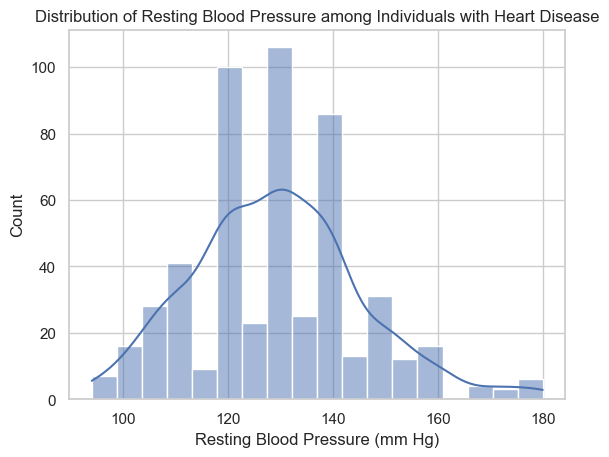

In [90]:
# What is the distribution of resting blood pressure (trestbps) among individuals with heart disease?

# Filter the data for individuals with heart disease
df_heart_disease = df[df['target'] == 1]

# Create a histogram of resting blood pressure for individuals with heart disease
sns.histplot(data=df_heart_disease, x='trestbps', kde=True)

# Set labels and title
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Count')
plt.title('Distribution of Resting Blood Pressure among Individuals with Heart Disease')

# Show the plot
plt.show()

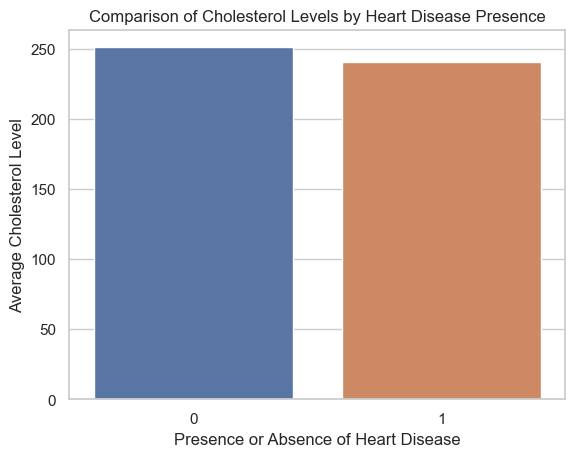

In [91]:
# Do people who have heart disease have a higher cholestrol compare to people absence of heart disease? 
# Calculate the average cholesterol level for each target category
avg_chol_by_target = df.groupby('target')['chol'].mean()

# Create a bar plot to compare average cholesterol levels by target
sns.barplot(x=avg_chol_by_target.index, y=avg_chol_by_target.values)

# Set labels and title
plt.xlabel('Presence or Absence of Heart Disease')
plt.ylabel('Average Cholesterol Level')
plt.title('Comparison of Cholesterol Levels by Heart Disease Presence')

# Show the plot
plt.show()

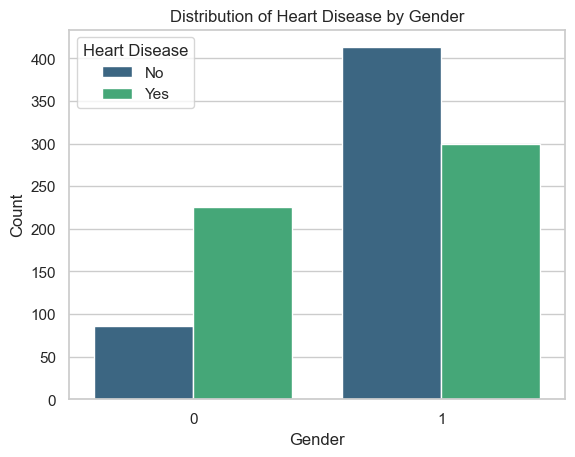

In [92]:
# Are males at a higher risk of developing heart disease compared to females?
# Create a count plot of target (heart disease) by gender
sns.countplot(x='sex', hue='target', data=df, palette='viridis')

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease by Gender')

# Set legend
plt.legend(title='Heart Disease', labels=['No', 'Yes'])

# Show the plot
plt.show()

In [98]:
# Selecting a predictor based on mean
df.groupby('target').agg(
 {
     'age' :'mean',
     'sex' :'mean',
     'cp' :'mean',
     'trestbps':'mean',
     'chol':'mean',
     'fbs' :'mean',
     'restecg':'mean',
     'thalach':'mean',
     'exang' :'mean',
     'slope' :'mean',
     'ca' :'mean',
     'thal':'mean'
     
 })

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal
target,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,1.593156,0.370722,2.119772


In [ ]:
# Selecting age, thalach, restecg, and ca 

In [105]:
# 70 to 30 split
X = df[['age', 'thalach','restecg','ca']]
y = df['target']

# 70% for training set, 30% for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [106]:
# Checking for separation in the datasets
print("Y_train: ", sum(y_train == 0))
print("Y_train: ", sum(y_train == 1))
print("Y_test: ", sum(y_test == 0))
print("Y_test: ", sum(y_test == 1))

Y_train:  338
Y_train:  379
Y_test:  161
Y_test:  147


In [107]:
# Building the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [110]:
#Checking the various metrics for the model
acc = model.score(X_train, y_train)

predictions = model.predict(X_train)
tp = sum((predictions == 1) & (y_train == 1))
fp = sum((predictions == 1) & (y_train == 0))
tn = sum((predictions == 0) & (y_train == 0))
fn = sum((predictions == 0) & (y_train == 1))
sens = tp / (tp + fn)
spec = tn / (tn + fp)

print("Training Accuracy: ", acc)
print("Training Sensitivity: ", sens)
print("Training Specificity: ", spec)

Training Accuracy:  0.7182705718270572
Training Sensitivity:  0.7810026385224275
Training Specificity:  0.6479289940828402


In [112]:

coefs = ["age", "thalach", "restecg", "ca"]

# Checking in terms of log-odds
for coef, val  in zip(coefs, model.coef_[0]):
    print(coef, ":", round(val, 2))

age : -0.0
thalach : 0.04
restecg : 0.75
ca : -0.69


In [113]:
# Checking in terms of odds
for coef, val  in zip(coefs, model.coef_[0]):
    print(coef, ":", round(np.exp(val), 2))

age : 1.0
thalach : 1.05
restecg : 2.13
ca : 0.5


In [114]:
# Checking the various metrics for the model (test set)
acc = model.score(X_test, y_test)

predictions = model.predict(X_test)
tp = sum((predictions == 1) & (y_test == 1))
fp = sum((predictions == 1) & (y_test == 0))
tn = sum((predictions == 0) & (y_test == 0))
fn = sum((predictions == 0) & (y_test == 1))
sens = tp / (tp + fn)
spec = tn / (tn + fp)

print("Test Accuracy: ", acc)
print("Test Sensitivity: ", sens)
print("Test Specificity: ", spec)

Test Accuracy:  0.6948051948051948
Test Sensitivity:  0.782312925170068
Test Specificity:  0.6149068322981367


In [ ]:
# Test Accuracy 75%, sensitivity was 79% and specificity was 72%
# Accuracy did not change much